# Julia Tutorial

<img src="https://camo.githubusercontent.com/e1ae5c7f6fe275a50134d5889a68f0acdd09ada8/687474703a2f2f6a756c69616c616e672e6f72672f696d616765732f6c6f676f5f68697265732e706e67" alt="Julia logo" style="width: 300px;"/>

*Scott Thomas, Institute of Astronomy*

This tutorial follows the Welcome to Julia talk. 

It assumes that you come with some knowledge of Python, IDL, Matlab, or a similar interactive (interpreted) language. That is, this is not a "how to program" tutorial, because you know that already. The syntax of Julia is similar to other interpreted languages and we won't spending much time discussing it, except to point out differences. 

You might also benefit from a little bit of knowledge about compiled languages like C or Fortran, at the idea of *types* and why telling the computer what type of values you are giving it is important. However, we'll go through this as well if time permits, as it's key to understanding how to write performant code.

# Contents

* Getting started
* Getting around
* Loading scripts and modules
* Arithmetic
* Arrays and indexing
* I/O
  
  **Exercise 1**: Filling the gaps: calling Python


* Functions
* Macros
  
  **Exercise 2**: Working with data: FITS images and arrays


* Control flow
* Performance notes
* Types
  
  **Exercise 3**: Easier programming with types and multiple dispatch


* Package management
* Final thoughts: is Julia for you?

# Getting started

3 methods to use Julia:
* Your own copy
* IoA's copy
* Online with [Juliabox](www.juliabox.org)

## The REPL

```console
> module load git python/2.7 
> module load python27_modules/ipython/3.0
> module load julia
> julia
```

The following command line options might be useful:
* `> julia -pN`: parallel processing; replace N with the number of cores to use
* `> julia <filename>`: execute a file
* `> julia -e "<code>"`: execute a piece of code

The REPL (Read-Eval-Print-Loop) will be familiar if you've used an interactive language before. Commands entered at the REPL will be executed immediately, so you can use it as a calculator or for tinkering. You can also load packages and script files from within the REPL.

Here's what the REPL looks like:

<img src="images/julia-terminal.png" alt="Julia command line" style="width: auto;"/>

## Jupyter

Jupyter is the new name of the IPython Notebook, an interactive browser-based programming environment. It now supports multiple languages including Julia, Python, and R (hence the name). I recommend that you load IPython 3.0 to gain access to Jupyter, because the default version on the IoA system is older (2.1).

```console

> ipython notebook --profile julia
```

Jupyter is the thing you are looking at now. It is similar to the REPL in that it interactive, but it also stores a full graphical history of your work. It is ideal for showing code or presenting results without having to write a full report. You can write in LaTeX and Markdown, and can also use it to make slideshows, like [Welcome to Julia](http://nbviewer.ipython.org/github/swt30/ioa-julia-tutorials/blob/master/welcome-to-julia.ipynb). Notebooks that you make can be [shared online](http://nbviewer.ipython.org/). In fact, you can view all the notebooks in this tutorial by going to http://nbviewer.ipython.org/github/swt30/ioa-julia-tutorials/.

# Getting Around

## Basic commands

* **Quit**
  * <kbd>ctrl</kbd>+<kbd>D</kbd> 
  * `quit()`
* **Cancel**
  * <kbd>ctrl</kbd>+<kbd>C</kbd> 
* **System commands**
  * `pwd()`
  * `cd("dir")`
  * `mv("f1", "f2")`
* **History**: 
  * <kbd>↑</kbd>, <kbd>↓</kbd> to move through history
  * <kbd>PgUp</kbd>, <kbd>PgDn</kbd> to match what you've already typed
  * <kbd>ctrl</kbd>+<kbd>R</kbd> to search backwards
* **Reset** your workspace to clear variables
  * `workspace()`
* **Result from last line**
  * is stored as **`ans`** in the REPL

## Other modes

* **Shell mode** or "Shelling out": press <kbd>;</kbd> to change the REPL to shell mode

  ```jlcon
  julia> *press ;*
  shell> ls
  ```

* **Help**: press <kbd>?</kbd> to change to help mode

  ```jlcon
  julia> *press ?*
  help?> logspace
  ```
  
Shell commands can also be created with backticks like this:

In [1]:
cmd = `echo hello`
run(cmd)

hello


## Whitespace and stuff

* No semicolons required except to prevent output
* Indentation does not matter
* Blocks and loops use the word `end`

In [2]:
for i=1:3
    println(i)
end

1
2
3


* Semicolons can be used to not return anything

In [3]:
# 
rand(2, 2)

2x2 Array{Float64,2}:
 0.527718   0.213646
 0.0645392  0.255528

In [4]:
rand(100, 100);

## Useful features

* Tab-completion: try typing `logsp` and hitting `TAB`
* Unicode: try typing `\alpha ` and hitting `TAB` a couple of times. Try other symbol names like `\lambda ` or `\pi `. See what happens if you hit enter to evaluate these. All Unicode symbols can be used as, or as part of, variable names. Some like `\pi` have predefined values, while others like `\ge` (≥) are functions.

In [5]:
λ = 3700  # \lambda
10λ

37000

In [6]:
π  # \pi

π = 3.1415926535897...

In [7]:
a = 5
b = 5
a ≥ b  # \ge

true

In [8]:
3 ∈ (1,2,4)  # \in

false

# Loading modules

Modules in Julia can be loaded in a couple of different ways depending on what you want to do with them.

## *Using* a module

Load modules with `using` when you want to access them fully. Loading a module with `using` brings in the module and makes its functions immediately available. If any function names clash, you'll be told.

In [9]:
using PyPlot

INFO: Loading help data...


All the functions that PyPlot chooses to export, like `plot()`, can now be called directly. Some functions internal to the module may not be exported by it, but you can always access these by doing `PyPlot.function`.

* Try `using PyPlot` and then typing `PyPlot.` and pressing `TAB` to see all the functions available. (In the notebook this will bring up a drop-down menu and you'll need to press `ENTER` to choose)
* Try `get_cmaps()`, a function exported by PyPlot, to print the colourmaps available. In the notebook you get a pretty colour chart.

In [10]:
get_cmaps()

* Try `find_backend()`, a function that PyPlot doesn't make available. This function is internal to the module so if you want to access it, you have to do `PyPlot.find_backend()`. You shouldn't usually need to access these internal functions though.

In [11]:
find_backend() # will tell you it's not defined

LoadError: find_backend not defined
while loading In[11], in expression starting on line 1

## *Importing* a module

You can also load modules with `import` if you don't want to use all of them, or if you need to import clashing names, or if you want to extend the package by adding functions. No names are made available immediately but you can pick and choose by putting the module name in front of the function. Examples:

In [12]:
import DataFrames

a1 = [1, 2, 3, 4, 5]
a2 = [1, 6, 7, 4, 9]

DataFrames.countne(a1, a2)  # countne: count not-equal

3

In [13]:
import StatsBase: sample, geomean
# or do: import StatsBase.sample, StatsBase.geomean

colours = ["red", "blue", "green"]
sample(colours, 5)

5-element Array{ASCIIString,1}:
 "blue" 
 "red"  
 "red"  
 "green"
 "green"

In [14]:
geomean([1, 2, 3])

1.8171205928321394

In [15]:
import Base.length  # more on why you would do this later

## Loading a script

The function `include` is like copying and pasting a script right into the REPL. Easy! If speed is at all important here, you will want to write this script as a function, something like `main()`, and then call that. This is for performance reasons (more [later](#Performance)).

In [16]:
;cat scripts/hello.jl

function main()
    println("Hello, world!")
end

main()


In [17]:
include("scripts/hello.jl")

Hello, world!


# Arithmetic

Assignments and arithmetic work very much like you'd expect, so we won't spend time on those. Function calls use round brackets (parentheses).

In [18]:
x = 3
y = 7
z = x + y

10

In [19]:
sin(pi/2)

1.0

You can write simple functions by putting them on one line and using an equals sign. You can omit **`*`** signs if the thing in front is a number and the thing afterwards is a variable (or something in brackets)

In [20]:
f(x) = 3x^2 - 4x + 1 
f(3)

16

In [21]:
3(2 + 1)

9

## Key things to look out for:

* The caret symbol **`^`** is used for exponentiation - different from Python

In [22]:
2^3

8

* Unlike Python 2, doing / on two integers will return a floating point number. (Use `div(a,b)` if you need integer division.)

In [23]:
7/9

0.7777777777777778

In [24]:
7/9 + 14/9

2.3333333333333335

* There's a rational number type made using `//`

In [25]:
7//9

7//9

In [26]:
7//9 + 14//9

7//3

* Boolean values are `true` and `false`, with no capitals.

In [27]:
3 < 0

false

## Numeric types: a gentle introduction

In [28]:
typeof(9)

Int64

In [29]:
typeof(7.1)

Float64

In [30]:
typeof(7//9)

Rational{Int64} (constructor with 1 method)

We'll talk more about types later, but for now it suffices to know that functions will only work on certain types. This should come as no surprise: you can't divide a string by a number.

In [31]:
typeof(1.8 + 3im)

Complex{Float64} (constructor with 1 method)

In [32]:
"hello" / 2

LoadError: `/` has no method matching /(::ASCIIString, ::Int64)
while loading In[32], in expression starting on line 1

# Arrays and indexing

Fast arrays are a core part of the language. You can make arrays in several ways.

In [33]:
# Some functions make arrays
linspace(0, 5, 10)

10-element Array{Float64,1}:
 0.0     
 0.555556
 1.11111 
 1.66667 
 2.22222 
 2.77778 
 3.33333 
 3.88889 
 4.44444 
 5.0     

In [34]:
# Type them in yourself
[1, 6, 2] # 1D array = column vector

3-element Array{Int64,1}:
 1
 6
 2

In [35]:
# Comprehensions like in Python
[x^2 for x=1:10]

10-element Array{Int64,1}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

The 1:10 we saw above makes a "range" which can be iterated over like xrange in python. You can use them to make arrays.

In [36]:
# Use ranges to make arrays
[1:5] # this syntax may change
collect(1:5)
[x for x=1:5]

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

In [37]:
# Also do row vectors and matrices
[2 3 5] # 2D array, now a row vector 

1x3 Array{Int64,2}:
 2  3  5

In [38]:
[1 2 3;
 4 5 6;
 7 8 9] # 2D matrix

3x3 Array{Int64,2}:
 1  2  3
 4  5  6
 7  8  9

Arrays are indexed using square brackets starting from 1. 

Yes, from 1.

***Don't worry, it will be okay***.

In [39]:
a = [1,2,3,4,5]

a[1], a[3]

(1,3)

In [40]:
a[0]

LoadError: BoundsError()
while loading In[40], in expression starting on line 1

Slices can be made using `:`. They include both ends (unlike Python where 1:2 would only capture one number). To get the end of an array, use the keyword `end`.

In [41]:
a[end]

5

In [42]:
a[2:end-1]

3-element Array{Int64,1}:
 2
 3
 4

Arrays are also indexed in column-major (Fortran) order. That means that you specify the row first, then the column. I believe this is the same as IDL, Fortran, and Matlab, but different to C/C++ and Python.

In [43]:
c = [1 2 3;
     4 5 6;
     7 8 9]

c[2, 3]

6

Because Julia handles its arrays in a mathematically consistent fashion, you can't multiply matrices of incompatible shapes.

In [44]:
v1 = [1, 2, 5]
v2 = [3, 6, 4]

v1 + v2 # adding two matching-sized vectors is fine

3-element Array{Int64,1}:
 4
 8
 9

In [45]:
# dot product: x⋅y == dot(x,y) == x * y'
x ⋅ y

21

In [46]:
v1 * v2 # this will cause an error

LoadError: `*` has no method matching *(::Array{Int64,1}, ::Array{Int64,1})
while loading In[46], in expression starting on line 1

But since we're often working with things of equal shape and want to do elementwise operations, we can use dotted versions of operators. There are dotted arithmetic operators:

    .*
    .^
    
etc, as well as dotted comparisons:

    .==
    .>
    .!=
    
and so on.

In [47]:
v1 .* v2

3-element Array{Int64,1}:
  3
 12
 20

In [48]:
v1 .>= v2

3-element BitArray{1}:
 false
 false
  true

Mixing types in arrays produces "Any" arrays, which are less efficient. Arrays work better when you keep the things in them the same type.

In [49]:
[3, "hello", 'a']

3-element Array{Any,1}:
   3       
    "hello"
 'a'       

For storing disparate sets of values you might want to use tuples instead. The type of a tuple matches the types of the things inside it.

In [50]:
(3, "hello", 'a')

(3,"hello",'a')

In [51]:
typeof(ans)

(Int64,ASCIIString,Char)

# I/O


## Printing

Use `println(...)` to print a line or `print(...)` to print without putting a newline at the end.

In [52]:
println("hi")
println("hello")
print("hey")
print("sup")

hi
hello
heysup

In Julia, double quotes are used for strings. Single quotes are reserved for referring to single characters. You can't write `'hello'`, for instance.

Use $ signs to interpolate values into strings.

In [54]:
name = "Scott"
"Hi $name"

"Hi Scott"

You can also join strings by using the **`*`** symbol between them.

## Files

The `readdlm`, `readcsv`,  `writedlm`, and `writecsv` functions get data in and out. For more sophisticated table handling there's DataTables (pure Julia) or Pandas (wrapper for a nice Python library).

In [55]:
data = readdlm("data/data.txt")

4x3 Array{Any,2}:
 "person"    "height"  "star_sign"
 "scott"    1.95       "gemini"   
 "justin"   1.75       "pisces"   
 "enrique"  1.87       "taurus"   

In [56]:
scott_actual_height = 1.85
data[2,2] = scott_actual_height
file = open("data/corrected_data.txt", "w")
writedlm(file, data)
close(file)

In [57]:
;cat data/corrected_data.txt

person	height	star_sign
scott	1.85	gemini
justin	1.75	pisces
enrique	1.87	taurus


## Interoperability

The PyCall package makes it easy to use Python libraries.

In [58]:
using PyCall
@pyimport scipy.optimize as so
@pyimport scipy.interpolate as si

g(x) = cos(x) - x
so.newton(g, 1.)

0.7390851332151607

In [59]:
interp = si.interp1d([1,2,3,4,5], [2,3,5,8,11])
pycall(interp, PyAny, [1.5, 2.5, 3.5, 4.5]) 
# this requires some more jiggling - see PyCall docs
# so really you'd want to use a Julia library for this

4-element Array{Float64,1}:
 2.5
 4.0
 6.5
 9.5

## Plotting

PyPlot provides a direct interface to Matplotlib. There are also other plotting packages available.

In [60]:
using PyPlot

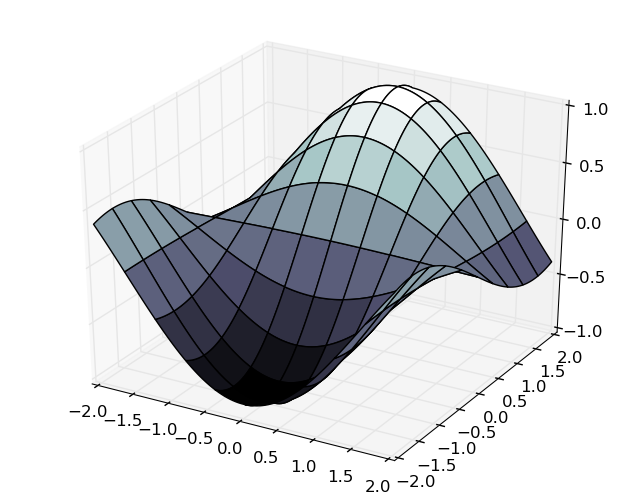

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7f54050fc3d0>

In [61]:
waves(x, y) = sin(x) * cos(y)

xs = linspace(-2, 2)
ys = linspace(-2 ,2)

zs = [waves(x, y) for x in xs, y in ys]
surf(xs, ys, zs, cmap="bone")

Now let's use our knowledge of how to call Python from Julia to solve a simple least-squares fitting problem using standard Scipy functions.

# [Exercise 1: Filling in the gaps with Python](exercise-1-julia-python.ipynb)

# Functions

You can define functions using a one-line syntax:

In [62]:
poly(x) = x^2 - 7x + 3

poly (generic function with 1 method)

Or a more extensive syntax:

In [63]:
function long_poly(x)
    y = x^2
    z = 7x
    y + z + 3
end

long_poly (generic function with 1 method)

Whichever you choose, the last thing you write is the return value (but you can use `return` at any time to force an early return). There are also anonymous functions ("lambda functions") which are nice for including in one-liners. The syntax uses an arrow  (**`->`**).

In [64]:
x -> x^2

(anonymous function)

In [65]:
map(x -> x^2, 1:5)

5-element Array{Int64,1}:
  1
  4
  9
 16
 25

In [66]:
# if you're familiar with "logical indexing", you can do
a = [-2, 3, 6, -8, -1]
a[a .> 0]
# to get numbers in an array larger than zero.

# But you can also use a filter function:
gzero(x) = x > 0
filter(gzero, [-2, 3, 6, -8, -1])

# to avoid defining and naming a function, make it anonymous
filter(x -> x>0, [-2, 3, 6, -8, -1])

2-element Array{Int64,1}:
 3
 6

Finally, Julia has tuple unpacking like Python, so you can return multiple values by just returning a tuple. These can be made without parentheses if you just put a comma in.

In [67]:
switch(x, y) = y, x
switch(3, 7)

(7,3)

In [68]:
a, b = switch(3, 7)
a

7

# Macros

Macros are powerful programming tools that let you use code to write code. You can write your own if you want, but at first you'll just want to know how to use some of the built-in ones. Here's an example of some in action:

In [69]:
# @evalpoly rewrites polynomials to use the computationally efficient Horner's method

poly1(p) = @evalpoly p 9 2 6 4 7 1 8 3
poly2(p) = 9 + 2p + 6p^2 + 4p^3 + 7p^4 + 1p^5 + 8p^6 + 3p^7
@time p1 = [poly1(x) for x in 1:1000]
@time p2 = [poly2(x) for x in 1:1000]
@assert p1 == p2

elapsed time: 6.91e-6 seconds (8064 bytes allocated)
elapsed time: 4.3827e-5 seconds (8064 bytes allocated)


Here we used a macro called **`@evalpoly`** to rewrite a polynomial expression into a more efficient form. We also used **`@time`** to check how long something took and how much memory it used, as well as **`@assert`** to check that something was true. If the two results weren't the same, **`@assert`** would have raised an error for us. Using assertions is therefore a useful way to check your assumptions in the middle of code.

Other useful macros include:

* **`@parallel`**: make a for loop into a parallel for loop
* **`@__FILE__`**: the path to the current file
* **`@profile`**: see which bits of code take the longest
* **`@which`**: tells you which version of a particular function is being used when you call it in a particular way
* **`@edit`**: edit the relevant function definition
* **`@vectorize_1arg`** and **`@vectorize_2arg`**: make a function of a single variable automatically work on arrays (and they're fast) 
* **`@pyimport`** once `PyCall` is loaded: make a Python package available in Julia
* **`@show`**: show the value of something on screen as it's done. Nice for debugging, and also check out...
* **`@debug`** and **`@bp`** once `Debug` is loaded, for stopping inside code and examining what's going on

# Control flow

Control works like any other language. Key features:

* blocks must finish with the word **`end`**
* **`if`** ... **`elseif`** ... **`else`** ... **`end`**
* **`for`** loops work with either `x in collection` or `x=collection`. This looks more natural in some cases like `x=1:10`
* Julia also has **`begin`**/**`end`** for multi-statement code blocks, or you can put them on one line with semicolons:

```jl
x = 3; sx = sin(x); cx = cos(x)
```

* You can define your own modules by wrapping them in

```jl
module ModuleName
module_code_goes_here
end
```

and access them by `using` or `import`ing them.

Let's now try an exercise which has us working with FITS files, and do a simple performance check to see whether it's faster to call a Python library or to use a Julia library to read in FITS.

# [Exercise 2: Working with FITS images](exercise-2-FITS.ipynb)

# Performance

Writing as much as your code as possible in functions is always a good idea (and this doesn't just go for Julia). The JIT compiler specialises code based on functions. If you write small functions that do one thing each then they are more easily understood by you, more easily optimized by the compiler, and more re-usable.

To make functions fast, there are two important rules.

* Keep them short. The compiler can infer the types of things at the boundary of each function, and choose the best route through the code for you. Longer functions introduce more complexity for the compiler.
* Make them type-stable. This means that you should make sure they return the same type of value every time they run. Type instability will cause performance loss. You can always ignore this advice, but it will be important in performance-critical code!

Here's a contrived example of how type stability affects things.

In [70]:
# an array of ten million random numbers
A = rand(10000000)

# this function is not type stable
function badround(x)
    if x >= 0.5
        return 1.0
    else
        return 0
    end
end

# this function is type-stable
function goodround(x)
    if x >= 0.5
        return 1
    else
        return 0
    end
end

goodround (generic function with 1 method)

In [71]:
# run them once to compile them
@show badround(0.7)
@show goodround(0.7);

badround(0.7) => 1.0
goodround(0.7) => 1


In [72]:
# time each one
@time map(badround, A)
@time map(goodround, A);

elapsed time: 0.814627479 seconds (324752212 bytes allocated, 5.86% gc time)
elapsed time: 0.46097649 seconds (240332580 bytes allocated, 35.51% gc time)


Other things to do to ensure performance include:

* Try not to use global variables (declared outside of functions). If you do, declare them as **`const`** like this:

In [73]:
const N_ITERATIONS = 100

100

The compiler will have trouble optimizing code using global variables if you don't do this, as they could theoretically change types at any time if you don't declare them **`const`**.

Other things that help:

* Declare types in certain situations: see below.
* As well as writing type-stable functions, try not to change variable types during functions either. 
* See [Performance Tips](http://julia.readthedocs.org/en/latest/manual/performance-tips/) in the manual for further details.

# Types and how to use them

We had a quick look at numeric types earlier.

In [74]:
typeof(3)

Int64

In [75]:
typeof(7.8)

Float64

But everything in Julia has a type.

In [76]:
typeof("hello")

ASCIIString (constructor with 2 methods)

In [77]:
typeof([1,7,4])

Array{Int64,1}

In [78]:
typeof(typeof)

Function

In [79]:
typeof(`echo hello`)

Cmd (constructor with 1 method)

In [80]:
typeof(quote
    print("hello")
end)

Expr

All of these types exist in a type hierarchy, where the top type is **`Any`**. You will need just a few commands to use standard types: 

* **`typeof(x)`** to get the type of things
* **`::`** to annotate types
* **`<:`** to check subtypes
* **`isa(x, type)`** to check if something is a particular type 
* **`convert(type, x)`** to convert between types

In [81]:
typeof(3)

Int64

In [82]:
x = 3
x::Int # declares that x is an integer here; anything else will cause an error

3

In [83]:
yell(x::String) = uppercase(x) * "!"
yell("yeehaw")

"YEEHAW!"

In [84]:
yell(3)

LoadError: `yell` has no method matching yell(::Int64)
while loading In[84], in expression starting on line 1

In [85]:
Float64 <: FloatingPoint

true

In [86]:
isa(3.7, FloatingPoint)

true

In [87]:
convert(FloatingPoint, 3)

3.0

You often don't need to declare types at all, but there are some situations where they can help. These include when defining your own types (so they can be stored efficiently), in certain inner loops (so they can be iterated efficiently), and whenever you're getting a value from somewhere where it's not obvious what the type should be from the source.

This is all well and good, and you can use these commands to play with types, but the real magic happens when you write your own: suddenly you have a really nice way to handle doing the same things to lots of different types of data. The great benefit is that you can do this without sacrificing performance and without having to constantly convert between types or check what type you're using.

# Write your own types

A `type` in Julia is a bit like a `struct` in C or a `class` in other languages. But unlike object oriented languages where you would write a class and many methods to go with it, in Julia the type just holds some values. Later on, you will write functions that behave differently on different types.

*Abstract* types, written **`abstract`**, are like categories that you group other types into. You declare them like this:

In [88]:
abstract Thing
abstract Living <: Thing
abstract Dead <: Thing

When you define any type, you can mark its supertype (parent) using the **`<:`** notation seen above. Abstract types are used only to help define the type hierarchy. You can't do much with them besides test if things are subtypes. However, that's pretty useful by itself, as we'll see.

A normal **`type`** holds a number of fields that you define:

In [89]:
type Skeleton <: Dead end
type Plant <: Living
    species
end
type Animal <: Living
    species
    noise
end

Finally, there are *immutable* types. Calling something **`immutable`** is like saying **`const type`**. We won't worry about those at the moment.

You make *instances* of types by just calling the type name and listing the fields:

In [90]:
randy = Animal("squirrel", "scritch scritch")
palmy = Plant("palm tree")
skelly = Skeleton()

Skeleton()

In [91]:
typeof(randy)

Animal (constructor with 1 method)

In [92]:
typeof(skelly)

Skeleton (constructor with 1 method)

Then you can access the fields of an instance by using a dot:

In [93]:
palmy.species

"palm tree"

In [94]:
randy.species = "brown squirrel"

"brown squirrel"

That's quite useful for handling data. You can easily make types that handle collections of different data: for example, an equation and associated boundary values, or coordinates, or whatever. However, multiple dispatch makes it more worthwhile to use types in your code.

# Multiple dispatch

If you've programmed in an object-oriented language before, you'll know that you can provide objects with "methods": functions that apply specifically to that object. 

Multiple dispatch takes this idea and makes it way better. In Julia, you can write the same function many times and have it do different things depending on the types of the arguments. 

In [95]:
double(x::Number) = 2x
double(s::String) = "$s$s"
@show typeof("ha")
double("ha")

typeof("ha") => ASCIIString


"haha"

In [96]:
@show typeof(3)
double(3)

typeof(3) => Int64


6

Only the versions that you need are compiled when the program is run. That means that, above, only the version relevant to Int64 and ASCIIString types have been compiled. This is what I mean by Julia being able to "specialise" at function boundaries.

This becomes very powerful when you start to write functions in ways that do *conceptually* the same thing but *procedurally* something different. For example, Julia can be fast because all of its mathematical code uses this concept: it will choose the version of some mathematical procedure which is computationally optimal for a particular type. That could be something simple like just returning 1 immediately if you call length(v) where v is a UnitVector, rather than calculating it like the more general case.

Let's imagine we want two functions that work on our Things from above.

* **`say`**, which will tell us what noise something makes.
* **`isalive`**, which returns `true` if something is alive and `false` otherwise.

How would we write these?

In [97]:
# isalive just checks if the thing is a Living type
isalive(l) = isa(l, Living)

isalive (generic function with 1 method)

In [98]:
# using `say` on an animal makes the noise of the animal...
say(a::Animal) = println("The $(a.species) goes '$(a.noise)'.")

# but `say` on another living thing tells us that we don't know what noise it makes
say(l::Living) = println("I don't know what a $(l.species) sounds like.")

say (generic function with 2 methods)

In [99]:
isalive(randy)

true

In [100]:
isalive(skelly)

false

In [101]:
say(randy)

The brown squirrel goes 'scritch scritch'.


In [102]:
say(palmy)

I don't know what a palm tree sounds like.


Since we didn't define a method of **`say`** that covers dead things, this shouldn't be a surprise:

In [103]:
say(skelly)

LoadError: `say` has no method matching say(::Skeleton)
while loading In[103], in expression starting on line 1

# [Example 3: Using types in a simple N-body code](exercise-3-types.ipynb)

# Package management

Julia's package management is super simple. From within Julia:

* `Pkg.init()` to set up your package directory
* `Pkg.status()` to see what's installed
* `Pkg.add("PkgName")` and `Pkg.rm("PkgName")` to add and remove packages
* `Pkg.edit()` to edit your list of packages (add and remove several at once)
* `Pkg.update()` updates all packages

If for whatever reason you need to reset your Julia packages and start again, just remove `~/.julia`. Everything is installed into there.

The thing that is most likely to confuse you is that Julia's package manager is "declarative": it figures out what packages you need and installs only those. That means that if a Package A is required by Package B and Package B is updated to no longer require Package A, Package A will be removed from your system.

The way the Julia package manager works doesn't currently support system-wide installs very well. That means that you won't see the IoA-wide packages when you run Pkg.status(). You can still call them by doing `using` or `import` though, and they will work just fine. If you ever run into problems with the system-wide packages, you can always install your own versions. They will go into your `~/.julia` folder and be used in preference to the IoA version.

These packages are installed IoA-wide to get you started:

* IJulia: Lets you use this nice notebook interface (jupyter) by running `ipython notebook`
* PyCall: Import and use Python libraries
* PyPlot: Interface to Matplotlib
* Debug: Breakpoint-based debugging
* DataFrames: Work with tabular data
* StatsBase: Statistical functions
* Distributions: Probability distributions and associated functions
* Optim: Numerical optimization algorithms
* ODE: Ordinary differential equation solvers
* Lora: MCMC inference
* FITSIO: FITS file interface

Some of these are under active development and if your key concern is stability, you might prefer to avoid them. The Python interfaces are quite solid, though.

# Final thoughts
## Is Julia for you?

Julia is for you if:

* You are unhappy with your current programming language
* You do a lot of work where you need numerical speed, for which you are writing your own algorithms
* You also do data exploration and analysis where you need interactivity
* Switching between easy-to-write languages like Python and fast languages like C is difficult for you, or you have had bad experiences with using things like Cython
* You don't want to have to keep asking yourself if writing a particular loop will be slow, but just want to go ahead and write it
* You like the idea of object-oriented programming, with hierarchies of types, but found that it doesn't quite "click" in scientific computing to have methods attached to objects
* You care about computer science terms like homoiconicity, or like to use an "elegant" language

Julia is not for you if:

* You are perfectly happy with your current language
* You want performance but are unwilling to pay a little attention to data types 
* You want performance equal to or better than C/Fortran, rather than within a factor of 2-3
* You want a large choice of packages for any situation
* You are not doing programming that falls under the "general-purpose/data science/scientific computing" umbrella: e.g. symbolic algebra
* You are doing statistical work for which you need a wide array of statistical tools already implemented - though this is constantly changing
* You need absolute stability in the language or packages that you use
* You freak out when things are indexed from 1 (seriously, **it will be okay**)